<a href="https://colab.research.google.com/github/vansh123321/Projects/blob/master/X_Ray_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop

import tensorflow as tf

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import plotly.offline as py
import plotly.express as px
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

Using TensorFlow backend.


# **Reading Data**

In [ ]:
DATASET_DIR = "../input/covid-19-x-ray-10000-images/dataset"



In [ ]:
os.listdir(DATASET_DIR)


['covid', 'normal']

**Normal Image**

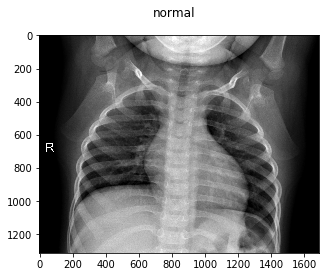

In [ ]:

normal_images = []
for img_path in glob.glob(DATASET_DIR + '/normal/*'):
    normal_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('normal')
plt.imshow(normal_images[0], cmap='gray') 



# Detection

**Covid Image**

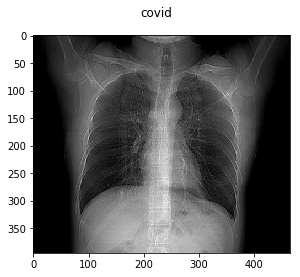

In [ ]:
covid_images = []
for img_path in glob.glob(DATASET_DIR + '/covid/*'):
    covid_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('covid')
plt.imshow(covid_images[0], cmap='gray') 

**Length of images**

In [ ]:
print(len(normal_images))
print(len(covid_images))

28
70


**Input Shape, Epochs and Batch Size**

* **Epochs** - One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE
* **Batch Size** -Total number of training examples present in a single batch.

In [ ]:
IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 48
BATCH_SIZE = 6

# **Model**

Applying Convolutional Neural Network which is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. Convolution is a mathematical operation to merge two sets of information.In CNN architectures, pooling is typically performed with 2x2 windows, stride 2 and no padding. While convolution is done with 3x3 windows, stride 1 and with padding

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])



**Model Summary**

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)       

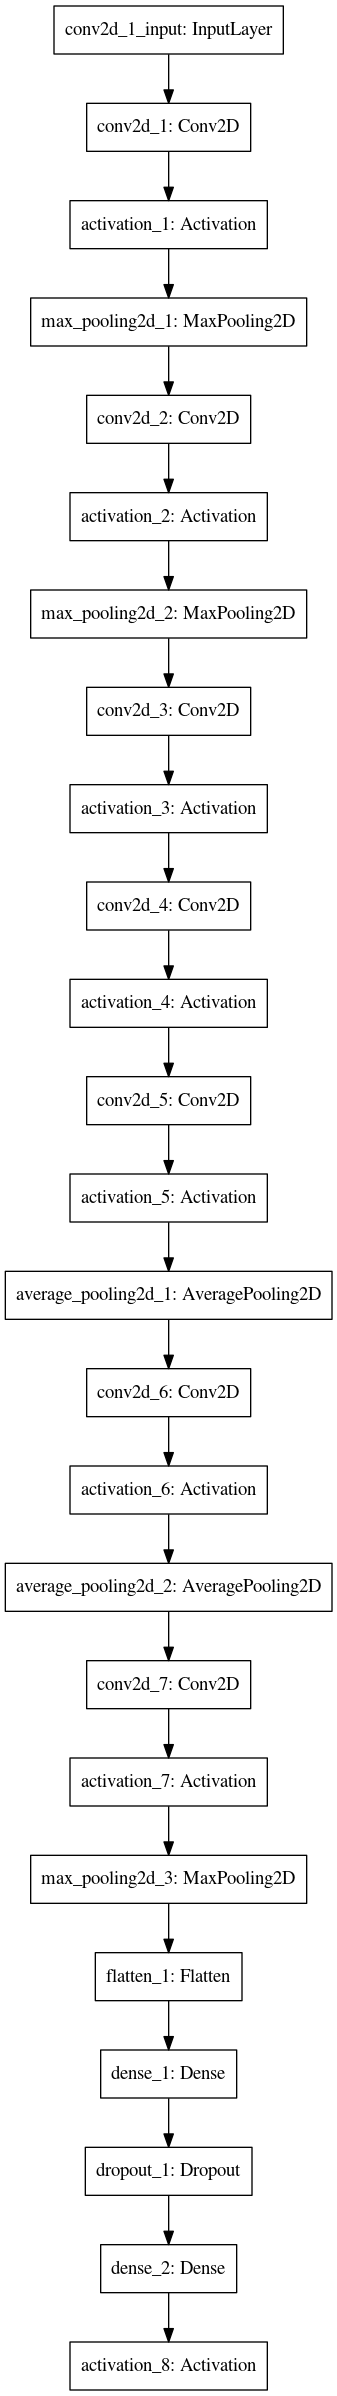

In [ ]:
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model1.png')

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.25)

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)

Found 74 images belonging to 2 classes.
Found 24 images belonging to 2 classes.
Epoch 1/48
12/12 [==============================] - 5s 443ms/step - loss: 1.9681 - accuracy: 0.6765 - val_loss: 1.0708 - val_accuracy: 0.7083
Epoch 2/48
12/12 [==============================] - 5s 399ms/step - loss: 0.6182 - accuracy: 0.7059 - val_loss: 1.0176 - val_accuracy: 0.7083
Epoch 3/48
12/12 [==============================] - 4s 364ms/step - loss: 0.6243 - accuracy: 0.7353 - val_loss: 0.9119 - val_accuracy: 0.7083
Epoch 4/48
12/12 [==============================] - 5s 378ms/step - loss: 0.7720 - accuracy: 0.7059 - val_loss: 0.8314 - val_accuracy: 0.7083
Epoch 5/48
12/12 [==============================] - 4s 370ms/step - loss: 0.6003 - accuracy: 0.7206 - val_loss: 2.1504 - val_accuracy: 0.7083
Epoch 6/48
12/12 [==============================] - 5s 385ms/step - loss: 0.6274 - accuracy: 0.7206 - val_loss: 1.0416 - val_accuracy: 0.7083
Epoch 7/48
12/12 [==============================] - 5s 390ms/step - 

**Plotting Graph - Accuracy and Loss**

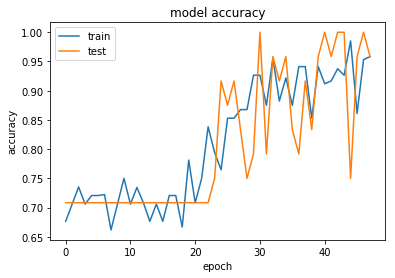

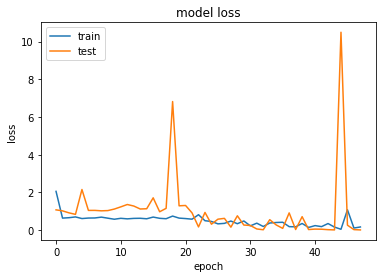

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Accuracy**

In [ ]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.9583333
validation_accuracy 0.9583333134651184


**Labelling and Prediction**

In [ ]:
label = validation_generator.classes
pred= model.predict(validation_generator)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
{'covid': 0, 'normal': 1}
['covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid']


# **Confusion Matrix**

A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.

In [ ]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(predicted_class_indices,label)
cf

array([[17,  7],
       [ 0,  0]])

In [ ]:
exp_series = pd.Series(label)
pred_series = pd.Series(predicted_class_indices)
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,All
Actual,,
0,17,17
1,7,7
All,24,24


**Plotting Confusion Matrix**

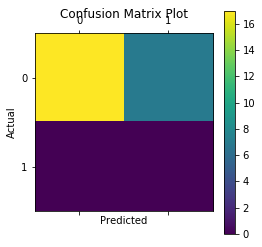

In [ ]:
plt.matshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

# **Prevention**  
![](http://defiancelibrary.org/images/CoronaVirusInfo.jpg)
**    To avoid the critical situation people are suggested to do following things** 
*     Avoid contact with people who are sick. 
*     Avoid touching your eyes, nose, and mouth. 
*     Stay home when you are sick. 
*     Cover your cough or sneeze with a tissue, then throw the tissue in the trash. 
*    Clean and disinfect frequently touched objects and surfaces using a regular household  
*    Wash your hands often with soap and water, especially after going to the bathroom; before eating; and after blowing     your nose, coughing, or sneezing. If soap and water are not readily available, use an alcohol-based hand sanitizer.